# Actividad 1


## Eliminación de Duplicados y Tratamiento de Datos Faltantes
Contamos con un conjunto de datos ficticio de una tienda en línea que contiene información sobre clientes, incluyendo nombre, edad y correo electrónico. Realizar las siguientes tareas:
* Cargar el conjunto de datos.
* Identificar y eliminar las filas duplicadas.
* Manejar los datos faltantes en la columna de edad, evaluando cuál es la mejor decisión, considerando que vamos a realizar un análisis enfocado en grupos etarios de los clientes. Evaluar el impacto sobre el análisis si:
  * Se eliminan las filas que no contienen la edad.
  * Se completa el dato con la media de la columna.

In [4]:
# 1. Importamos librerias
import pandas as pd

In [13]:
# 2. Importamos datos de Google Sheets
ID_planilla = '13ufG0CQqpozGhJfh8t3T-01p4lcPPZa26TrrWhQux3c'
URL = f'https://docs.google.com/spreadsheets/d/{ID_planilla}/gviz/tq?tqx=out:csv&sheet='
# URL = "https://docs.google.com/spreadsheets/d/13ufG0CQqpozGhJfh8t3T-01p4lcPPZa26TrrWhQux3c/edit?gid=0#gid=0" #Asi no funciona
df = pd.read_csv(URL)
df

,Nombre,Edad,Email
0,Elonore Over,40.0,eoverh6@ocn.ne.jp
1,Jacquette Gillbe,49.0,jgillbeb8@diigo.com
2,Sheelah Olechnowicz,61.0,solechnowiczch@mlb.com
3,Morris Bilovus,32.0,mbilovus3q@artisteer.com
4,Erda Geipel,60.0,egeipelj5@jalbum.net
...,...,...,...
1027,Olivia Braganca,52.0,obragancaat@ucsd.edu
1028,Leia Duckett,62.0,lduckett2z@java.com
1029,Kaitlynn Sigmund,45.0,ksigmund8e@census.gov
1030,Stanton Lyne,45.0,slyned5@paypal.com


In [6]:
# Veamos la estructura del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  1032 non-null   object 
 1   Edad    973 non-null    float64
 2   Email   1032 non-null   object 
dtypes: float64(1), object(2)
memory usage: 24.3+ KB


### Eploracion y tratamiento de duplicados

In [ ]:
# Cuantificamos los registros duplicados
df.duplicated().sum()

In [31]:
# Visualizar los registros duplicados
df[df.duplicated(keep="first")].sort_values(by="Nombre")

,Nombre,Edad,Email
838,Arnoldo Britney,52.0,abritney8f@arstechnica.com
535,Berny Rawlin,49.0,brawlin94@time.com
907,Candace Ruperti,NaN,cruperti8t@furl.net
468,Daniella Vasey,59.0,dvasey95@nydailynews.com
1002,Davis Matthiae,25.0,dmatthiae8q@mozilla.com
456,Dewain Lindmark,66.0,dlindmark8k@chronoengine.com
929,Donella Bandy,44.0,dbandy99@freewebs.com
1025,Edik Tapley,54.0,etapley8p@networksolutions.com
488,Edita Jost,52.0,ejost8l@omniture.com
738,Federica Shambrook,33.0,fshambrook96@cdbaby.com


In [36]:
# Usamos drop_duplicates() para eliminar los registros duplicados
df_pp1 = df.drop_duplicates(keep="first")
df_pp1[df_pp1["Nombre"]== "Arnoldo Britney"]

,Nombre,Edad,Email
577,Arnoldo Britney,52.0,abritney8f@arstechnica.com


In [37]:
df_pp1.duplicated().sum()

np.int64(0)

In [40]:
df_pp1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1031
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  1000 non-null   object 
 1   Edad    943 non-null    float64
 2   Email   1000 non-null   object 
dtypes: float64(1), object(2)
memory usage: 31.2+ KB


### Eploracion y tratamiento de nulos

In [41]:
# Ver si hay datos nulos y cuantos
df_pp1.isnull().sum()

,0
Nombre,0
Edad,57
Email,0


In [ ]:
# Visualizar los nulos
df_pp1[df_pp1.isnull().any(axis=1)][["Nombre", "Edad"]] #axis = 1 filas / axis = 2 columnas

In [56]:
df_pp1.columns

Index(['Nombre', 'Edad', 'Email'], dtype='object')

In [ ]:
# Eliminar los nulos df_pp2
df_pp2 = df_pp1.dropna(subset=['Edad', 'Email'], how="any")
df_pp2.info()

In [66]:
# Visualizamos despues de eliminar
df_pp2[df_pp2.isnull().any(axis=1)]

,Nombre,Edad,Email


In [ ]:
# Reemplazar nulos por un valor fijo df_pp3
df_pp3 = df_pp1.fillna(0)
df_pp3[df_pp3["Edad"]==0]

In [81]:
# Reemplazar nulor por la media/mediana df_pp3
media=df_pp1["Edad"].mean()
mediana=df_pp1["Edad"].median()
df_pp3 = df_pp1.fillna(media)
df_pp3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1031
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  1000 non-null   object 
 1   Edad    1000 non-null   float64
 2   Email   1000 non-null   object 
dtypes: float64(1), object(2)
memory usage: 63.5+ KB


In [ ]:
df_pp4 = df_pp1.fillna(method="bfill") # df_pp4 reemplaza con la edad del registro amterior o posterior
df_pp4.info()

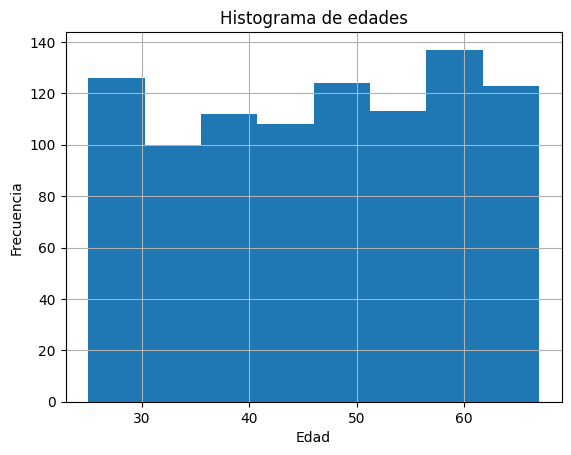

In [90]:
# df es el original con duplicados con nulos
# df_pp1 sin duplicados con nulos
# df_pp2 sin duplicados drop nulos
# df_pp3 sin duplicados fillna(media)
# df_pp4 sin duplicados fillna(method="bfill")
import matplotlib.pyplot as plt
df_pp1["Edad"].hist(bins=8)
plt.title("Histograma de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

/tmp/ipython-input-2178607322.py:3: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x=df_pp1["Edad"], color="red", join=False, estimator="mean")  # agrega la media


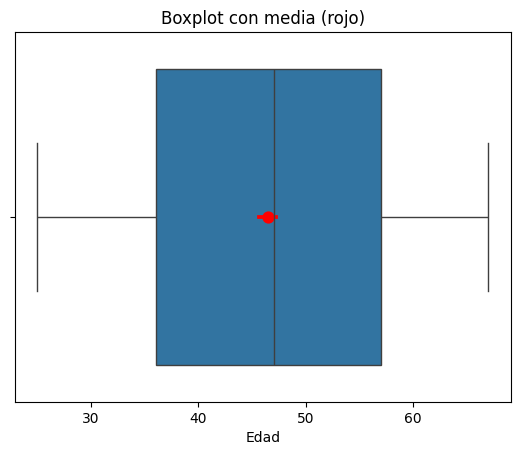

In [77]:
import seaborn as sns
sns.boxplot(x=df_pp1["Edad"])
sns.pointplot(x=df_pp1["Edad"], color="red", join=False, estimator="mean")  # agrega la media
plt.title("Boxplot con media (rojo)")
plt.show()

In [83]:
df.describe()

,Edad
count,973.000000
mean,46.512847
std,12.307242
min,25.000000
25%,36.000000
50%,47.000000
75%,57.000000
max,67.000000


# Actividad 2

In [ ]:
# Importamos datos de Google Sheets
ID_planilla = '170GDFJKpZEaBbA48mII018sW6qBOGz2X4UlV4HNQaWo'
URL = f'https://docs.google.com/spreadsheets/d/{ID_planilla}/gviz/tq?tqx=out:csv&sheet='
df = pd.read_csv(URL)
df.head()

In [ ]:
df.info()

In [ ]:
# Convertir tipo de dato de Precio



In [ ]:
# Normalizar
